Matplotlib version: 3.9.0
Pandas version: 2.2.2
Numpy version: 2.0.0


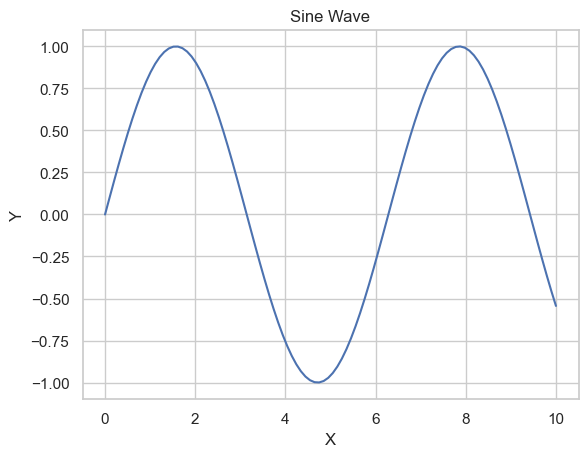

In [1]:
# Importar y configurar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización para gráficos
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

# Verificar las versiones de las librerías
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")

# Crear un gráfico simple para verificar Matplotlib
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)
plt.title("Sine Wave")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [6]:
import os
import pandas as pd

# Ruta relativa del archivo Excel
relative_path = '../../data/raw/MJ-JUNIO-2024.xlsx'

# Obtener la ruta absoluta del archivo Excel
current_dir = os.getcwd()
ruta_excel = os.path.abspath(os.path.join(current_dir, relative_path))

# Verificar si el archivo existe
if os.path.exists(ruta_excel):
    print(f"El archivo {ruta_excel} existe en la ruta: {ruta_excel}")
    # Leer el archivo Excel, saltando las primeras filas innecesarias
    df = pd.read_excel(ruta_excel, skiprows=5)
    # Eliminar la columna sin nombre que no contiene datos
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    # Renombrar columnas
    df.columns = [
        'Numero', 'Nombre', 'Cargo', 'Area', 'Estatus', 'Sexo', 'Fecha_Entrada', 
        'Sueldo_Bruto', 'AFP', 'ISR', 'SFS', 'Otros_Descuentos', 'Total_Descuentos', 
        'Neto'
    ]
    # Mostrar las primeras filas del DataFrame con las columnas renombradas
    print("Primeras filas del DataFrame con columnas renombradas:\n", df.head())
else:
    print(f"El archivo {ruta_excel} no se encontró en la ruta: {ruta_excel}")

# Convertir la columna 'Fecha_Entrada' a tipo datetime
df['Fecha_Entrada'] = pd.to_datetime(df['Fecha_Entrada'], errors='coerce')

# Convertir columnas numéricas a tipo float
cols_to_convert = ['Sueldo_Bruto', 'AFP', 'ISR', 'SFS', 'Otros_Descuentos', 'Total_Descuentos', 'Neto']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Guardar en un archivo Excel para revisión
output_path = os.path.abspath(os.path.join(current_dir, '../../data/clean/MJ-JUNIO-2024_clean.xlsx'))
df.to_excel(output_path, index=False)
print(f"Datos guardados en {output_path}")


El archivo c:\Users\bourd\source\repos\IncomeInference\data\raw\MJ-JUNIO-2024.xlsx existe en la ruta: c:\Users\bourd\source\repos\IncomeInference\data\raw\MJ-JUNIO-2024.xlsx
Primeras filas del DataFrame con columnas renombradas:
   Numero                       Nombre                   Cargo  \
0      1    RAFAEL JESUS FELIZ GARCIA                MINISTRO   
1      2   ANA ELIZABETH DIAZ RAMIREZ    SECRETARIA EJECUTIVA   
2      3         CAMILO CAMILO PUJOLS  ASISTENTE DEL DESPACHO   
3      4   CRISTY MACOLLE ORTIZ ARIAS    SECRETARIA EJECUTIVA   
4      5  WELINGTON ALBERTO MORA PIÑA     CHOFER DEL MINISTRO   

                    Area                             Estatus       Sexo  \
0  DESPACHO DEL MINISTRO         EMPLEADO FIJO (POR DECRETO)  MASCULINO   
1  DESPACHO DEL MINISTRO  EMPLEADA DE CARRERA ADMINISTRATIVA   FEMENINO   
2  DESPACHO DEL MINISTRO                      EMPLEADO FIJO   MASCULINO   
3  DESPACHO DEL MINISTRO                       EMPLEADA FIJA   FEMENINO   
4  D

OSError: Cannot save file into a non-existent directory: 'c:\Users\bourd\source\repos\IncomeInference\notebooks\MJ-JUNIO-2024\data\clean'